In [1]:
import pandas as pd
import zipfile
import requests
import os

# Download the dataset
url = "https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip"
response = requests.get(url)

# Save the zip file
zip_file_path = "wholesale_customers.zip"
with open(zip_file_path, "wb") as f:
    f.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the dataset into a DataFrame
data = pd.read_csv("Wholesale customers data.csv")

# Drop the Region column
data = data.drop(columns=["Region"])
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [2]:
# Filter the data for clients that are restaurants, hotels, and caf�s (Channel 2)
filtered_data = data[data['Channel'] == 2]
filtered_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
4,2,22615,5410,7198,3915,1777,5185
5,2,9413,8259,5126,666,1795,1451


In [3]:
# Normalize the data by computing the proportionate spending per product category
normalized_data = filtered_data.copy()
normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)

normalized_data.head()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_231764\542855690.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.371394
1      0.212139
2      0.173532
4      0.490564
5      0.352415
         ...   
418    0.018631
421    0.458769
423    0.596678
424    0.466074
437    0.187722
Name: Fresh, Length: 142, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)
C:\Users\LucaH\AppData\Local\Temp\ipykernel_231764\542855690.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.283068
1      0.294896
2      0.240590
4      0.117354
5      0.309210
         ...   
418    0.239774
421    0.130320
423    0.125212
424    0.079161
437    0.200085
Name: Milk, Length: 142, dtype: floa

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
4,2,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
5,2,0.352415,0.309210,0.191913,0.024934,0.067203,0.054324


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = normalized_data.copy()
standardized_data.iloc[:, 1:] = scaler.fit_transform(normalized_data.iloc[:, 1:])

standardized_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,2,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
4,2,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
5,2,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [5]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Standardize the data
scaler = StandardScaler()
standardized_data.iloc[:, 1:] = scaler.fit_transform(normalized_data.iloc[:, 1:])

standardized_data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,2,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
4,2,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
5,2,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Re-load the filtered and normalized data
data = pd.read_csv("Wholesale customers data.csv")
filtered_data = data[data['Channel'] == 2]
normalized_data = filtered_data.copy()
normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)

# Standardize the data
scaler = StandardScaler()
standardized_data = normalized_data.copy()
standardized_data.iloc[:, 1:] = scaler.fit_transform(normalized_data.iloc[:, 1:])

standardized_data.head()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_231764\2470376122.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.000088
1      0.000090
2      0.000082
4      0.000065
5      0.000112
         ...   
418    0.000085
421    0.000081
423    0.000102
424    0.000082
437    0.000039
Name: Region, Length: 142, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_data.iloc[:, 1:] = normalized_data.iloc[:, 1:].div(normalized_data.iloc[:, 1:].sum(axis=1), axis=0)
C:\Users\LucaH\AppData\Local\Temp\ipykernel_231764\2470376122.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.371362
1      0.212119
2      0.173518
4      0.490532
5      0.352375
         ...   
418    0.018629
421    0.458732
423    0.596617
424    0.466035
437    0.187715
Name: Fresh, Length: 142, dtype: 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.538196,0.979742,0.701086,-1.109726,-0.696610,-1.049193,-0.008555
1,2,0.604034,0.074502,0.835646,-0.528898,0.268893,-0.757016,0.394224
2,2,0.361549,-0.144936,0.217842,-1.213295,0.532034,-0.798853,4.968916
4,2,-0.135040,1.657187,-1.184187,-1.686519,0.929728,-1.614250,2.074493
5,2,1.255620,0.871811,0.998420,-1.371610,-0.310759,-1.207857,0.420818


In [8]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
standardized_data['Cluster'] = kmeans.fit_predict(standardized_data.iloc[:, 1:])

standardized_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,0.538196,0.979742,0.701086,-1.109726,-0.696610,-1.049193,-0.008555,1
1,2,0.604034,0.074502,0.835646,-0.528898,0.268893,-0.757016,0.394224,0
2,2,0.361549,-0.144936,0.217842,-1.213295,0.532034,-0.798853,4.968916,1
4,2,-0.135040,1.657187,-1.184187,-1.686519,0.929728,-1.614250,2.074493,1
5,2,1.255620,0.871811,0.998420,-1.371610,-0.310759,-1.207857,0.420818,1


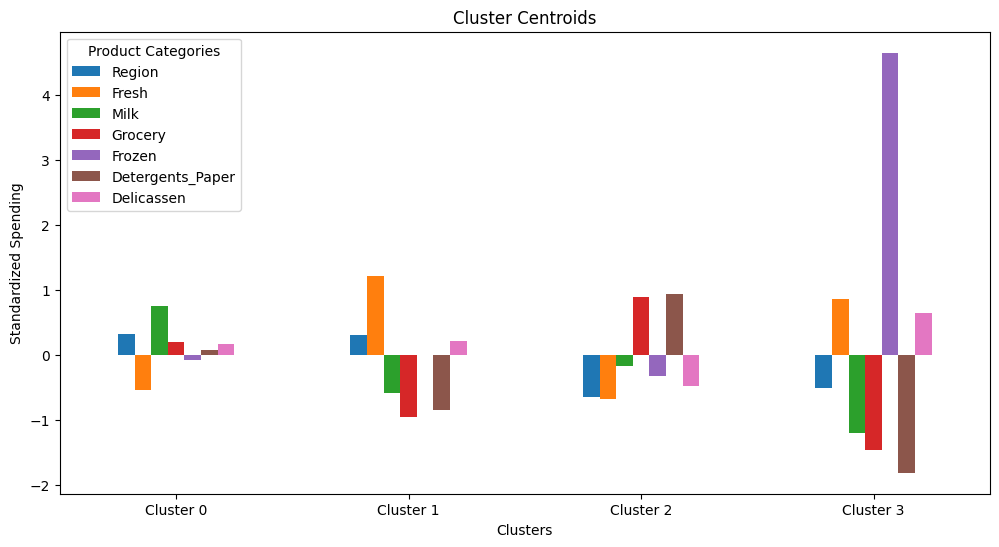

In [9]:
import matplotlib.pyplot as plt

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=standardized_data.columns[1:-1])
centroids_df.index = [f'Cluster {i}' for i in range(centroids_df.shape[0])]

# Plot the centroids
centroids_df.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centroids')
plt.ylabel('Standardized Spending')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.legend(title='Product Categories')
plt.show()

In [10]:
# Analyze the spending patterns for each cluster
cluster_descriptions = standardized_data.groupby('Cluster').mean()

cluster_descriptions

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,2.0,0.315753,-0.543431,0.754475,0.190749,-0.084137,0.079353,0.173075
1,2.0,0.310700,1.212234,-0.590493,-0.958158,-0.006293,-0.845587,0.209774
2,2.0,-0.644460,-0.676181,-0.178484,0.889786,-0.326305,0.939896,-0.479995
3,2.0,-0.515612,0.863128,-1.205432,-1.457508,4.649751,-1.814178,0.645723
